In [1]:
using TaylorSeries, Plots

function step!(f, y, n, t, h)
    k₁ = f(t[n], y[n])
    k₂ = f(t[n] + h/2, y[n] + h*k₁/2)
    k₃ = f(t[n] + h/2, y[n] + h*k₂/2)
    k₄ = f(t[n] + h, y[n] + h*k₃)
    y[n+1] = y[n] + (h/6) * (k₁ + 2k₂ + 2k₃ + k₄)
    t[n+1] = t[n] + h
end

function solve(f, h, t₀, T, y₀)
    N = round(Int, (T - t₀) / h)
    t = Vector{Float64}(undef, N)
    y = Vector{typeof(y₀)}(undef, N)
    y[1] = y₀; t[1] = t₀; 
    for n in 1:N-1
        step!(f, y, n, t, h)
    end
    y, t
end

#augmented eom
function f_quad(t, y) 
    [1 - y[1]^2, 2*y[2]*y[1] ]
end

f_quad (generic function with 1 method)

In [3]:
_tend = 1.0
ξ = Taylor1(25)
set_taylor1_varname("ξ")
u0 = 0.0
g(x) = x^2

g (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/mforets/Projects/escritoire/2021/Week4/tmp.gif
└ @ Plots /home/mforets/.julia/packages/Plots/SjqWU/src/animation.jl:104


Plots.AnimatedGif("/home/mforets/Projects/escritoire/2021/Week4/tmp.gif")
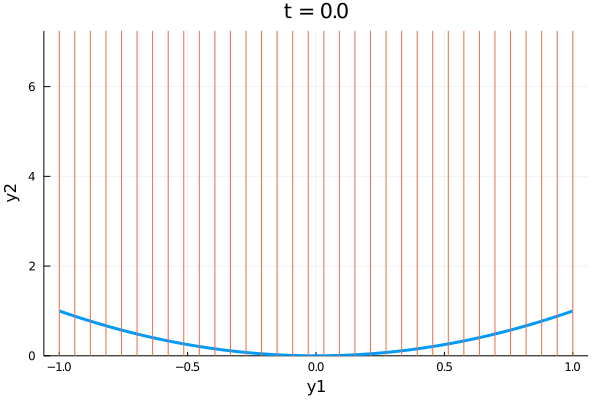

In [4]:
# define IC, note second state IC is just a change of variables of the 1st. Leading to a Taylor expansion of g(x) for 2nd state
_u0ξ = u0 + ξ
u0ξ = [_u0ξ, g(_u0ξ)]

plot(x->u0ξ[2](x),-1,1)  # TaylorSeries expansion of g(x).
y, t = solve(f_quad, 0.01, 0.0, _tend, u0ξ);
xrange = range(-1,1, length=100)
y2max = maximum([maximum(_y[2].(xrange)) for _y in y])

anim = @animate for (yi,ti) ∈ zip(y,t)
    _y1 = yi[1].(xrange)
    _y2 = yi[2].(xrange)
    plot(_y1, _y2, leg = false, lw = 3, xlabel = "y1", ylabel = "y2")
    vline!(_y1[1:3:end])
    title!("t = $(round(ti*100)/100)")
    ylims!(0.0,y2max)
end

gif(anim, fps=15)